In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/content/drive/MyDrive/PY/TimeSeriesRecSys/Data_HetRec/user_taggedmovies.dat',sep="\s+", )
df

,userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,353,5290,29,10,2006,23,20,15
1,78,4223,5264,16,4,2007,4,43,45
2,127,1343,1544,28,8,2007,3,42,27
3,127,1343,12330,28,8,2007,3,42,27
4,127,2080,1451,28,8,2007,3,42,47
...,...,...,...,...,...,...,...,...,...
47952,71534,7937,306,3,12,2007,3,7,14
47953,71534,8848,331,3,12,2007,3,6,19
47954,71534,8848,427,3,12,2007,3,6,27
47955,71534,25833,7671,3,12,2007,3,7,31


In [ ]:
df.loc[:,'timestamps'] = df.date_year.astype('str')+'_'+ df.date_month.astype('str')+'_'+ df.date_day.astype('str')+'_'+ \
df.date_hour.astype('str')+'_'+df.date_minute.astype('str')+'_'+df.date_second.astype('str')

df.loc[:,'timestamps'] = df.loc[:,'timestamps'].apply(pd.to_datetime,format='%Y_%m_%d_%H_%M_%S')
df['dayofweek_num']=df['timestamps'].dt.dayofweek  
df['weekofyear']=df['timestamps'].dt.weekofyear
df['quarter']=df['timestamps'].dt.quarter
df['days_in_month']=df['timestamps'].dt.days_in_month
df['is_month_start']=df['timestamps'].dt.is_month_start
df['is_month_end']=df['timestamps'].dt.is_month_end
df['is_quarter_start']=df['timestamps'].dt.is_quarter_start
df['is_quarter_end']=df['timestamps'].dt.is_quarter_end
df['is_year_start']=df['timestamps'].dt.is_year_start
df['is_year_end']=df['timestamps'].dt.is_year_end
df['is_leap_year']=df['timestamps'].dt.is_leap_year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [ ]:
df

,userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second,timestamps,dayofweek_num,weekofyear,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year
0,75,353,5290,29,10,2006,23,20,15,2006-10-29 23:20:15,6,43,4,31,False,False,False,False,False,False,False
1,78,4223,5264,16,4,2007,4,43,45,2007-04-16 04:43:45,0,16,2,30,False,False,False,False,False,False,False
2,127,1343,1544,28,8,2007,3,42,27,2007-08-28 03:42:27,1,35,3,31,False,False,False,False,False,False,False
3,127,1343,12330,28,8,2007,3,42,27,2007-08-28 03:42:27,1,35,3,31,False,False,False,False,False,False,False
4,127,2080,1451,28,8,2007,3,42,47,2007-08-28 03:42:47,1,35,3,31,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47952,71534,7937,306,3,12,2007,3,7,14,2007-12-03 03:07:14,0,49,4,31,False,False,False,False,False,False,False
47953,71534,8848,331,3,12,2007,3,6,19,2007-12-03 03:06:19,0,49,4,31,False,False,False,False,False,False,False
47954,71534,8848,427,3,12,2007,3,6,27,2007-12-03 03:06:27,0,49,4,31,False,False,False,False,False,False,False
47955,71534,25833,7671,3,12,2007,3,7,31,2007-12-03 03:07:31,0,49,4,31,False,False,False,False,False,False,False


In [ ]:
# SimHash

# PCA

## All time data pca
(attributes manually added)

In [ ]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,3:]
cols = df_selected.columns
df_selected

,date_day,date_month,date_year,date_hour,date_minute,date_second,dayofweek_num,weekofyear,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year
0,29,10,2006,23,20,15,6,43,4,31,False,False,False,False,False,False,False
1,16,4,2007,4,43,45,0,16,2,30,False,False,False,False,False,False,False
2,28,8,2007,3,42,27,1,35,3,31,False,False,False,False,False,False,False
3,28,8,2007,3,42,27,1,35,3,31,False,False,False,False,False,False,False
4,28,8,2007,3,42,47,1,35,3,31,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47952,3,12,2007,3,7,14,0,49,4,31,False,False,False,False,False,False,False
47953,3,12,2007,3,6,19,0,49,4,31,False,False,False,False,False,False,False
47954,3,12,2007,3,6,27,0,49,4,31,False,False,False,False,False,False,False
47955,3,12,2007,3,7,31,0,49,4,31,False,False,False,False,False,False,False


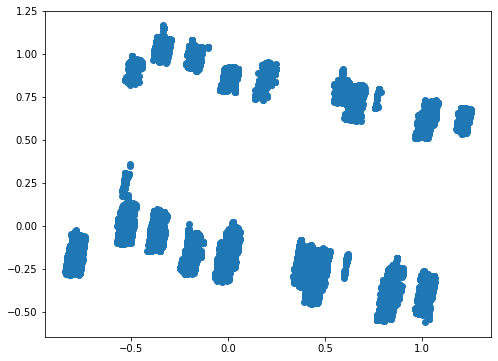

In [ ]:
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
# scaler.inverse_transform(df_selected)

vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1]) # user

### PCA result analysis

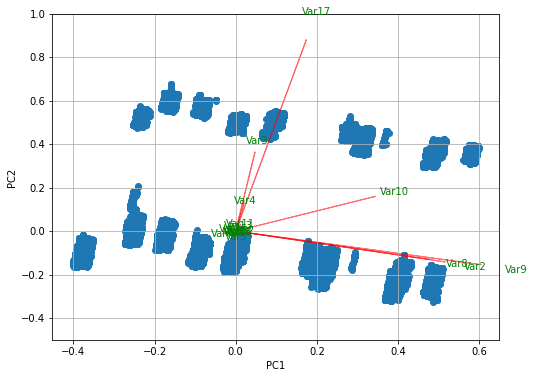

In [ ]:
# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(df_selected)
df_selected = scaler.transform(df_selected)    

pca = PCA()
x_new = pca.fit_transform(df_selected)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley) # c = y 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
# plt.xlim(-1,1)
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.30573866, 0.13857541])

In [ ]:
pca.components_

array([[ 1.07091652e-02,  5.12812900e-01,  4.71044614e-02,
         1.93923310e-02,  9.73887963e-04, -5.23078471e-04,
        -2.80068987e-02,  4.75152141e-01,  6.00944295e-01,
         3.40918063e-01,  1.09310664e-02,  1.02166365e-02,
         5.59405946e-03,  5.04748078e-03, -3.67042788e-03,
         4.77088891e-03,  1.73442040e-01],
       [-2.97427789e-03, -1.40894918e-01,  3.60125459e-01,
         1.20489254e-01, -2.30357049e-02, -2.85427435e-03,
        -1.08611523e-02, -1.29245532e-01, -1.53473176e-01,
         1.58099275e-01,  2.77193602e-02,  2.35685866e-03,
         2.29400846e-02, -4.67052443e-03,  8.18319096e-03,
        -3.67424796e-03,  8.76709055e-01]])

In [ ]:
pca.components_

array([[ 1.07091652e-02,  5.12812900e-01,  4.71044614e-02,
         1.93923310e-02,  9.73887963e-04, -5.23078471e-04,
        -2.80068987e-02,  4.75152141e-01,  6.00944295e-01,
         3.40918063e-01,  1.09310664e-02,  1.02166365e-02,
         5.59405946e-03,  5.04748078e-03, -3.67042788e-03,
         4.77088891e-03,  1.73442040e-01],
       [-2.97427789e-03, -1.40894918e-01,  3.60125459e-01,
         1.20489254e-01, -2.30357049e-02, -2.85427435e-03,
        -1.08611523e-02, -1.29245532e-01, -1.53473176e-01,
         1.58099275e-01,  2.77193602e-02,  2.35685866e-03,
         2.29400846e-02, -4.67052443e-03,  8.18319096e-03,
        -3.67424796e-03,  8.76709055e-01]])

In [ ]:
# get the most important features on the PCs 
n_pcs= pca.components_.shape[0] # 2

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = cols
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_pca = pd.DataFrame(dic.items())
df_pca

,0,1
0,PC0,quarter
1,PC1,is_leap_year
2,PC2,date_hour
3,PC3,dayofweek_num
4,PC4,days_in_month
5,PC5,date_minute
6,PC6,date_second
7,PC7,date_day
8,PC8,is_month_start
9,PC9,is_month_end


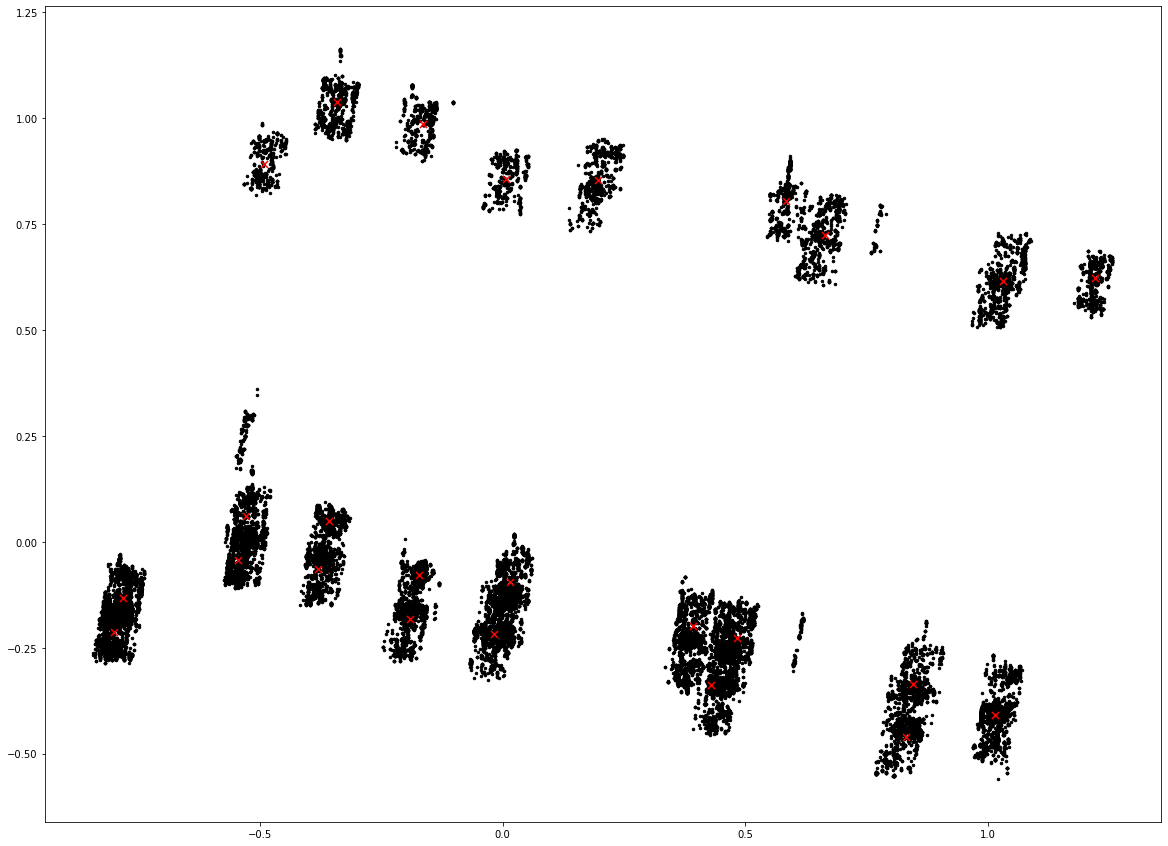

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (20, 15)

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
# plt.title('K-means clustering on the TSFresh Features (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.show()


In [ ]:
# df_selected = pd.DataFrame(df_selected)
# df_selected.columns = cols
# df_selected['cluster'] = label_pred
# df_selected = pd.concat([df.iloc[:,:3],df_selected], axis=1)
# df_selected.head()

,userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second,dayofweek_num,weekofyear,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year,cluster
0,75,353,5290,0.933333,0.818182,0.25,1.000000,0.338983,0.254237,1.000000,0.823529,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
1,78,4223,5264,0.500000,0.272727,0.50,0.173913,0.728814,0.762712,0.000000,0.294118,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
2,127,1343,1544,0.900000,0.636364,0.50,0.130435,0.711864,0.457627,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
3,127,1343,12330,0.900000,0.636364,0.50,0.130435,0.711864,0.457627,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
4,127,2080,1451,0.900000,0.636364,0.50,0.130435,0.711864,0.796610,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22


# Graph


In [ ]:
# test
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
 
G = nx.Graph()
Matrix = np.array(
    [
        [0, 1, 1, 1, 1, 1, 0, 0],  # a
        [0, 0, 1, 0, 1, 0, 0, 0],  # b
        [0, 0, 0, 1, 0, 0, 0, 0],  # c
        [0, 0, 0, 0, 1, 0, 0, 0],  # d
        [0, 0, 0, 0, 0, 1, 0, 0],  # e
        [0, 0, 1, 0, 0, 0, 1, 1],  # f
        [0, 0, 0, 0, 0, 1, 0, 1],  # g
        [0, 0, 0, 0, 0, 1, 1, 0]  # h
    ]
)
pos = nx.layout.spring_layout(G)
for i in range(len(Matrix)):
    for j in range(len(Matrix)):
        G.add_edge(i, j)
 
nx.draw(G)
plt.show()

## use centroids of Tagging + all time-series data pca

In [ ]:
dis_l1 = (pow(centroids[:,0],2)+pow(centroids[:,1],2))
dis_l1

array([0.63241715, 0.02248993, 0.62930406, 0.2478305 , 1.23416511,
       0.98672805, 0.4745856 , 0.05654733, 0.68729706, 0.65283004,
       0.04274901, 0.83148844, 0.24738381, 0.19822052, 1.44291516,
       0.10012788, 0.91722114, 0.33598854, 0.94125638, 0.66908064,
       0.05475995, 0.52203415, 0.02484719, 0.04968762, 0.14452386])

In [ ]:
df_dis = pd.DataFrame(np.zeros([25,25]))

for i in range(0,25):
  for j in range(0,25):
    # df_dis.iloc[i, j] = pow((dis_l1[i]-dis_l1[j]),2) #l1
    df_dis.iloc[i, j] = pow((centroids[:,0][i]-centroids[:,0][j]),2) + pow((centroids[:,1][i]-centroids[:,1][j]),2)

### Scaled

In [ ]:
scaler = MinMaxScaler()
df_dis = scaler.fit_transform(df_dis)
df_dis = pd.DataFrame(df_dis)
df_dis.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.369166,0.591543,0.576100,0.306035,0.850079,0.005916,0.233900,0.597780,0.007641,0.268587,0.836907,0.554847,0.581889,0.290077,0.157314,0.008569,0.028715,0.842244,0.604850,0.411339,0.002361,0.448504,0.368090,0.536075
1,0.253450,0.000000,0.131862,0.071302,0.436469,0.551820,0.204759,0.044845,0.140429,0.284976,0.015980,0.387861,0.066540,0.063579,0.450478,0.083591,0.306555,0.151908,0.382412,0.139962,0.006533,0.233243,0.075940,0.002965,0.043233
2,0.870731,0.282713,0.000000,0.034645,0.964297,0.957047,0.810242,0.663746,0.000324,0.956314,0.464993,0.543156,0.032141,0.053665,0.965830,0.768434,0.893564,0.728986,0.475495,0.000299,0.171546,0.876128,0.819554,0.212907,0.072073
3,0.602848,0.108678,0.024629,0.000000,0.672215,0.642304,0.544374,0.342180,0.029470,0.655150,0.225612,0.356468,0.000540,0.001507,0.686615,0.423269,0.646349,0.471900,0.323531,0.027426,0.053728,0.591306,0.383858,0.079961,0.005995
4,0.420732,0.874011,0.900632,0.883145,0.000000,0.224268,0.479541,0.859353,0.902064,0.330269,0.878686,0.402185,0.885226,0.878543,0.003019,0.713099,0.392137,0.567314,0.438134,0.900868,0.878615,0.430670,0.839171,0.880744,0.878246


In [ ]:
df_dis.describe().loc['75%',:].mean()

0.5742124276703159

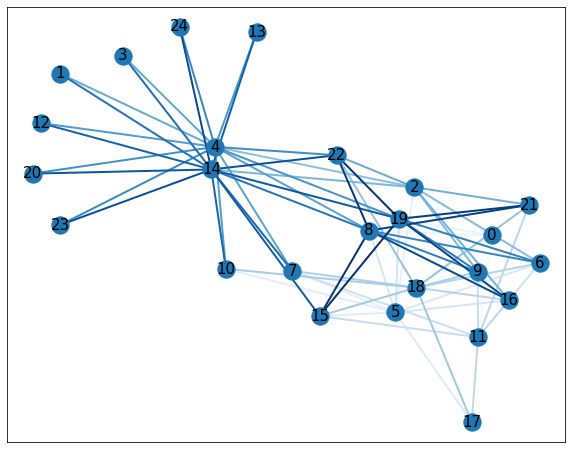

75


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random
random.seed(0)        
np.random.seed(0)
minDis = 0.8
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

### UnScaled 

In [ ]:
df_dis.describe().loc['75%',:].mean()

1.46120866498082

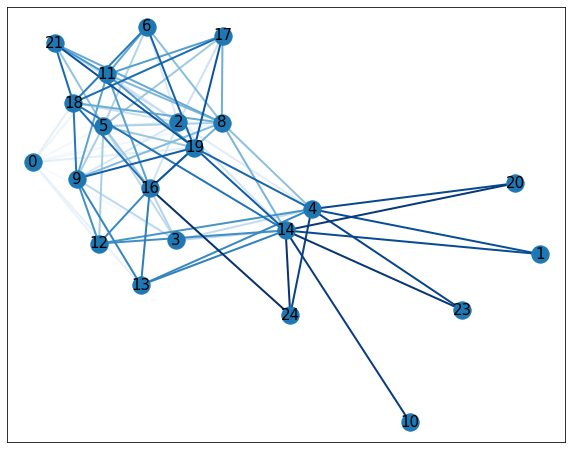

78


In [ ]:
random.seed(0)        
np.random.seed(0)
minDis = 1.4612
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)
pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

# LSH
https://www.learndatasci.com/tutorials/building-recommendation-engine-locality-sensitive-hashing-lsh-python/

https://onestopdataanalysis.com/lsh/


In [ ]:
pip install datasketch

     |████████████████████████████████| 67 kB 3.5 MB/s 


## PCA-USER + LSH

### Method 1 把tagging-PCA 结果group

In [ ]:
vectors_1d = PCA(n_components=1).fit_transform(df_selected)
df_user_1d = pd.concat([df.filter(regex="[^time_stamp]").loc[:,'userID'],pd.DataFrame(vectors_1d)],axis=1)

In [ ]:
df_user_lst = pd.DataFrame(df_user_1d.groupby('userID').apply(lambda x: list(x[0])))
df_user_lst['tag_num'] = df_user_lst[0].apply(len)
df_user_lst[df_user_lst.tag_num>2]

,0,tag_num
userID,,
127,"[0.43703809454894255, 0.4335724797796725, 0.43...",23
190,"[-0.045189717425882174, -0.044055620195745576,...",26
325,"[-0.4319548865480935, 0.3567702853601463, -0.0...",5
383,"[0.989486860731099, 0.9898309391580569, 0.8174...",4
477,"[0.4464709689351199, 0.446470647628355, 0.4463...",26
...,...,...
71420,"[-0.11863773063393639, -0.11918003643387194, -...",56
71478,"[-0.7498674851406913, -0.7660245891539287, 0.0...",3
71497,"[0.5514569995000097, 0.5511110666836331, 0.530...",41


In [ ]:
    start_time = time.time()
    minhash = []
    
    for pcas in df_user_lst[0]:
        pcas = str(pcas)
        m = MinHash(num_perm=32)
        for s in pcas:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=32)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))

### Method 2 把User-PCA 2D结果代入minHash

In [ ]:

m = MinHash()
data1 = [ 0.64816147, -0.54253993]
for d in data1:
  m.update(str(d).encode('utf8'))

In [ ]:
vectors

array([[ 0.77890402, -0.39060472],
       [-0.23016071, -0.14797051],
       [ 0.43704139, -0.29322769],
       ...,
       [ 1.05479409, -0.42498046],
       [ 1.07457846, -0.33916029],
       [ 1.08325624, -0.3532431 ]])

In [ ]:
    start_time = time.time()
    minhash = []
    
    for pcas in vectors:
        m = MinHash(num_perm=32)
        for s in pcas:
            m.update(str(s).encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=32)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))

It took 28.41197967529297 seconds to build forest.


In [ ]:
m.hashvalues

array([ 170058183,  231972810,   13184479,   31312792,  132721297,
        162003033,  223352304,  159809555,   56920750,  650229806,
         86101458,  267848141,  589979148,   60243568,  185660087,
        716560562,  303782223,  518718070,   75816273,  345530959,
        777096236,  171205302,  377605013,  225330139,  478898225,
        209569695,    3651271, 1313042232,   23909840,  146302257,
        614910999,   73081062], dtype=uint64)

In [ ]:
    start_time = time.time()
    
    query = vectors[2]
    m = MinHash(num_perm=32)
    for s in query:
        m.update(str(s).encode('utf8'))
        
    idx_array = np.array(forest.query(m, 10))
    if len(idx_array) == 0: 
      print("if your query is empty, return none")
    
    print(idx_array)

    # result = database.iloc[idx_array]['title']
    
    print('It took %s seconds to query forest.' %(time.time()-start_time))
    

[2]
It took 0.002424478530883789 seconds to query forest.


## MinHash Example
http://ekzhu.com/datasketch/minhash.html

In [ ]:
from datasketch import MinHash

data1 = ['minhash', 'is', 'a', 'probabilistic', 'data', 'structure', 'for',
        'estimating', 'the', 'similarity', 'between', 'datasets']
data2 = ['minhash', 'is', 'a', 'probability', 'data', 'structure', 'for',
        'estimating', 'the', 'similarity', 'between', 'documents']

m1, m2 = MinHash(), MinHash()
for d in data1:
    m1.update(d.encode('utf8'))
for d in data2:
    m2.update(d.encode('utf8'))
print("Estimated Jaccard for data1 and data2 is", m1.jaccard(m2))

s1 = set(data1)
s2 = set(data2)
actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
print("Actual Jaccard for data1 and data2 is", actual_jaccard)

Estimated Jaccard for data1 and data2 is 0.7109375
Actual Jaccard for data1 and data2 is 0.7142857142857143


In [ ]:
m1.hashfunc

<function datasketch.hashfunc.sha1_hash32>

In [ ]:
m1.hashvalues

array([ 297616339,  279951299,  113505080,  311917730,    1735256,
        278730948,  249258812,  306660385,  386953741,  423518424,
        120511132,  607298570,  490287863,  115094987,  290874010,
         58384851,   82568189,  483072302,  312640790,   86174351,
        198731659,  788039411,   54507159,  828911042,   93863906,
         16071831,  260431759,  316407020,  261463262, 1524825895,
        648376383,  206326676,  176707072,   18714679,  478567185,
        180270267,   89979232,  111646838,  240537181,  342142234,
        620096571, 1407834531,  330961037,  663383944, 1105899070,
        181581527,  132285593,  375422674, 1436377075,  484486034,
        252946215,   87331021,  374968398,  968098446,   72863372,
        484842735,  179471924,  672911886,   14648640,  656664915,
        417888415,  271335895,   10055390,   48164330,  430379235,
        622471011,  822143071,  365346353,  210165943,  633147285,
        415249929,  133327723,  258658760,  272079305,  134604

## MinHash example2 
https://towardsdatascience.com/locality-sensitive-hashing-how-to-find-similar-items-in-a-large-set-with-precision-d907c52b05fc
 

In [ ]:
import os
import time
import itertools
import collections
import numpy as np
import matplotlib.pyplot as plt

def cossim(u,v):
    norm = np.linalg.norm(u)*np.linalg.norm(v)
    cosine = u@v/norm
    ang = np.arccos(cosine)
    return 1-ang/np.pi

In [ ]:
# get some random data points
N = 1000
D= 50
A = np.random.randn(N,D)
# artificially make some similar to others
A[5] = A[99] +np.random.randn(D)*0.05
A[20] = A[85] +np.random.randn(D)*0.15
A[13] = A[19] +np.random.randn(D)*0.25
A[56] = A[71] +np.random.randn(D)*0.5
A[45] = A[49] +np.random.randn(D)*0.66

In [ ]:
df.shape

(47957, 21)

In [ ]:
A = df.sample(1000, random_state=0).filter(regex="[^time_stamp]").iloc[:,:13].values
A

array([[63725,   490,   780, ...,    40,     4,    31],
       [19885,   356,  2347, ...,     8,     1,    28],
       [41740,  3994,   371, ...,    23,     2,    30],
       ...,
       [41838,  1237,  6800, ...,     3,     1,    31],
       [44285,  5791, 14588, ...,     2,     1,    31],
       [33384, 53129,  9689, ...,    39,     3,    30]])

In [ ]:
# Brute force calculation baseline
true_pairs_dict = {}

thresh = 0.8

start = time.time()
for (i,u),(j,v) in itertools.combinations([(i,x) for i,x in enumerate(A)],2):
    val = cossim(u,v)
    if val > thresh:
        true_pairs_dict[(i,j)] = val
t_brute = time.time()-start

# save just the keys without the values. Easier to compare later to LSH
true_pairs = set(true_pairs_dict.keys())

print(f"Brute force calculation time: {t_brute:.3f}")
print(f"Discovered pairs:")
for k, v in true_pairs_dict.items():
    print(f"Pair: {k},\tSimilarity: {v:.2f}.")

Streaming output truncated to the last 5000 lines.
Pair: (421, 497),	Similarity: 0.81.
Pair: (421, 498),	Similarity: 0.90.
Pair: (421, 499),	Similarity: 0.91.
Pair: (421, 501),	Similarity: 0.85.
Pair: (421, 502),	Similarity: 0.95.
Pair: (421, 503),	Similarity: 0.95.
Pair: (421, 504),	Similarity: 0.98.
Pair: (421, 505),	Similarity: 0.92.
Pair: (421, 506),	Similarity: 0.82.
Pair: (421, 508),	Similarity: 0.94.
Pair: (421, 509),	Similarity: 0.95.
Pair: (421, 510),	Similarity: 0.91.
Pair: (421, 511),	Similarity: 0.98.
Pair: (421, 512),	Similarity: 0.91.
Pair: (421, 516),	Similarity: 0.82.
Pair: (421, 517),	Similarity: 0.87.
Pair: (421, 518),	Similarity: 0.84.
Pair: (421, 519),	Similarity: 0.91.
Pair: (421, 520),	Similarity: 0.94.
Pair: (421, 521),	Similarity: 0.95.
Pair: (421, 523),	Similarity: 0.97.
Pair: (421, 524),	Similarity: 0.96.
Pair: (421, 525),	Similarity: 0.85.
Pair: (421, 526),	Similarity: 0.98.
Pair: (421, 527),	Similarity: 0.98.
Pair: (421, 528),	Similarity: 0.95.
Pair: (421, 5

KeyboardInterrupt: ignored

In [ ]:
# Brute force calculation baseline
true_pairs_dict = {}

thresh = 0.8

start = time.time()
for (i,u),(j,v) in itertools.combinations([(i,x) for i,x in enumerate(A)],2):
    val = cossim(u,v)
    if val > thresh:
        true_pairs_dict[(i,j)] = val
t_brute = time.time()-start

# save just the keys without the values. Easier to compare later to LSH
true_pairs = set(true_pairs_dict.keys())

print(f"Brute force calculation time: {t_brute:.3f}")
print(f"Discovered pairs:")
for k, v in true_pairs_dict.items():
    print(f"Pair: {k},\tSimilarity: {v:.2f}.")

Brute force calculation time: 10.004
Discovered pairs:
Pair: (5, 99),	Similarity: 0.98.
Pair: (13, 19),	Similarity: 0.92.
Pair: (20, 85),	Similarity: 0.95.
Pair: (45, 49),	Similarity: 0.87.
Pair: (56, 71),	Similarity: 0.81.


In [ ]:
# LSH
b, r = 50, 18

n = b*r
print(f"Transition probability: {(1/b)**(1/r):.2f}")

Transition probability: 0.80


In [ ]:
S

array([[ 59962, 130424,   6942, ..., 132247, 221223, 109767],
       [252191, 166394, 178512, ..., 259674,  66405,  26603],
       [255474, 244728,  14700, ..., 218581, 140055, 123403],
       ...,
       [ 15567, 219786,  50557, ..., 179302,  54129, 184969],
       [ 21923,  47743, 191981, ..., 260437, 165731,  41347],
       [227487, 214427, 170919, ...,   9460,  23088,  15325]])

In [ ]:
D,n = 13,1000

In [ ]:
S

[array([[0, 1, 1, ..., 0, 1, 1],
        [0, 1, 1, ..., 0, 1, 1],
        [1, 1, 1, ..., 0, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 1, 1],
        [1, 0, 1, ..., 0, 1, 1],
        [1, 1, 0, ..., 0, 1, 1]]), array([[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 1, 0]]), array([[1, 1, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 1],
        [1, 0, 1, ..., 1, 0, 1]]), array([[1, 1, 0, ..., 1, 0, 0],
        [1, 1, 0, ..., 1, 0, 0],
        [1, 1, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 1, 0, 0]]), array([[1, 1, 1, ..., 0, 1, 0],
        [1, 1, 1, ..., 0, 1, 0],
        [1, 1, 1, ..., 0, 1, 0],
        ...,
        [1, 1, 1, ..., 0, 1, 0],
       

In [ ]:
# Compute LSH pairs
start = time.time()

# Compute signature matrix
R = A@np.random.randn(D,n) # @ is matrix multiplication
S = np.where(R>0,1,0)

# Break into bands
S = np.split(S, b, axis=1)

# column vector to convert binary vector to integer e.g. (1,0,1)->5
binary_column = 2**np.arange(r).reshape(-1,1)

# convert each band into a single integer, 
# i.e. convert band matrices to band columns
S = np.hstack([M@binary_column for M in S])

# Every value in the matrix represents a hash bucket assignment
# For every bucket in row i, add index i to that bucket
d = collections.defaultdict(set)
with np.nditer(S,flags=['multi_index']) as it:
    for x in it:
        d[int(x)].add(it.multi_index[0])
        
# For every bucket, find all pairs. These are the LSH pairs.
candidate_pairs = set()
for k,v in d.items():
    if len(v) > 1:
        for pair in itertools.combinations(v,2):
            candidate_pairs.add(tuple(sorted(pair)))

# Finally, perform the actually similarity computation
# to weed out false positive
lsh_pairs = set()
for (i,j) in candidate_pairs:
    if cossim(A[i],A[j]) > thresh:
        lsh_pairs.add((i,j))
        
t_lsh = time.time()-start

print(f"LSH calculation time: {t_lsh:.3f}")

LSH calculation time: 0.313


In [ ]:
candidate_pairs

{(48, 849),
 (211, 840),
 (217, 651),
 (87, 528),
 (643, 931),
 (128, 815),
 (56, 444),
 (202, 624),
 (495, 542),
 (812, 915),
 (195, 915),
 (254, 761),
 (440, 736),
 (37, 770),
 (168, 378),
 (683, 902),
 (578, 858),
 (697, 872),
 (300, 879),
 (616, 888),
 (105, 623),
 (140, 960),
 (929, 983),
 (17, 64),
 (125, 628),
 (291, 545),
 (436, 660),
 (646, 771),
 (43, 346),
 (150, 722),
 (281, 609),
 (138, 631),
 (265, 946),
 (379, 799),
 (215, 615),
 (218, 882),
 (38, 595),
 (330, 735),
 (167, 622),
 (665, 894),
 (25, 49),
 (703, 839),
 (705, 825),
 (375, 715),
 (212, 735),
 (12, 678),
 (380, 675),
 (88, 154),
 (144, 535),
 (73, 285),
 (272, 955),
 (20, 892),
 (257, 915),
 (96, 234),
 (343, 994),
 (188, 320),
 (550, 793),
 (594, 604),
 (64, 584),
 (176, 423),
 (32, 188),
 (466, 641),
 (73, 91),
 (273, 755),
 (18, 588),
 (148, 611),
 (558, 761),
 (208, 968),
 (261, 391),
 (704, 973),
 (28, 661),
 (212, 445),
 (286, 401),
 (449, 466),
 (72, 466),
 (806, 877),
 (309, 395),
 (366, 675),
 (555, 9

In [ ]:
d

defaultdict(set,
            {59962: {0},
             130424: {0},
             6942: {0, 52},
             39702: {0, 144},
             261595: {0},
             67843: {0},
             249737: {0},
             213291: {0},
             51803: {0},
             111379: {0},
             179342: {0},
             147009: {0},
             220926: {0},
             17707: {0},
             2021: {0},
             135004: {0, 376},
             13433: {0, 705},
             58239: {0, 202},
             73501: {0},
             237283: {0},
             5379: {0, 314},
             229774: {0, 103},
             8495: {0},
             182904: {0},
             109729: {0},
             156653: {0},
             159314: {0},
             235280: {0},
             140626: {0},
             176755: {0},
             257300: {0},
             45864: {0},
             78103: {0},
             97290: {0},
             207957: {0},
             174499: {0},
             113044: {0},
      

## LSH for cosinesimilarity

https://www.kaggle.com/paulrohan2020/location-sensitive-hashing-for-cosine-similarity/data

In [ ]:
vector_1 = [3, 45, 7, 2]
vector_2 = [2, 54, 13, 15]
np.dot(vector_1, vector_2),np.array(vector_1) * np.array(vector_2)

(2557, array([   6, 2430,   91,   30]))

In [ ]:
np.sum(np.array(vector_1) * np.array(vector_2))

2557

In [ ]:
np.linalg.norm([3,4])

5.0

In [ ]:
np.linalg.norm(np.array(vector_1) * np.array(vector_2))

2431.8957625687826

In [ ]:
cosine_similarity_2 = np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
print(cosine_similarity_2)

0.9722842517123499


https://tostr.pl/blog/locality-sensitive-hashing-for-angular-distance-in-python/

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.sqrt(np.dot(a, a)) * np.sqrt(np.dot(b, b)))

def angular_distance(a, b):
    return np.arccos(cosine_similarity(a, b)) / np.pi

class AngularLSHIndex(object):
    
    def __init__(self, dim, hash_no):
        # dim - dimensionality of used vectors
        self.dim = dim
        self.hash_no = hash_no
        # draw hash_no random vectors
        self.hash_vecs = np.random.uniform(low=-1.0, size=(hash_no, dim))
        # standard python dictionary will be our "index"
        # for small hash_no values this could be a list
        self.db = {}
    

    def get_hash_key(self, vec):
        # compute dot product of all hash vectors
        # and check the sign
        sv = vec.dot(self.hash_vecs.T) > 0
        # binary vector to byte string
        return np.packbits(sv).tostring()

    def add(self, vec):
        k = self.get_hash_key(vec)
        self.db.setdefault(k, []).append(vec)
    
    def get(self, vec):
        k = self.get_hash_key(vec)
        return self.db.get(k, [])

        
def dot_binary(vec, bin_arr):
    return np.apply_along_axis(
        lambda x: np.sum(vec[x]) - np.sum(vec[~x]),
        1,
        bin_arr
        )

## NIPS Papers dataset
https://www.kaggle.com/benhamner/nips-papers?select=papers.csv

https://www.kaggle.com/benhamner/exploring-the-nips-papers

In [ ]:
import numpy as np
import pandas as pd
import re
import time
from datasketch import MinHash, MinHashLSHForest

In [ ]:
def preprocess(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens

In [ ]:
text = 'The devil went down to Georgia'
print('The shingles (tokens) are:', preprocess(text))

The shingles (tokens) are: ['the', 'devil', 'went', 'down', 'to', 'georgia']


In [ ]:
#Number of Permutations
permutations = 128

#Number of Recommendations to return
num_recommendations = 1

In [ ]:
def get_forest(data, perms):
    start_time = time.time()
    
    minhash = []
    
    for text in data['text']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=perms)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))
    
    return forest

In [ ]:
def predict(text, database, perms, num_results, forest):
    start_time = time.time()
    
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
        
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none
    
    result = database.iloc[idx_array]['title']
    
    print('It took %s seconds to query forest.' %(time.time()-start_time))
    
    return result

In [ ]:
db = pd.read_csv('/content/drive/MyDrive/PY/TimeSeriesRecSys/paper_dataset/papers.csv')
db['text'] = db['title'] + ' ' + db['abstract']
forest = get_forest(db, permutations)

It took 19.092541933059692 seconds to build forest.


In [ ]:
num_recommendations = 5
title = 'Using a neural net to instantiate a deformable model'
result = predict(title, db, permutations, num_recommendations, forest)
print('\n Top Recommendation(s) is(are) \n', result)

It took 0.011797666549682617 seconds to query forest.

 Top Recommendation(s) is(are) 
 995     Neural Network Weight Matrix Synthesis Using O...
5       Using a neural net to instantiate a deformable...
5191    A Self-Organizing Integrated Segmentation and ...
2069    Analytic Solutions to the Formation of Feature...
2457    Inferring Neural Firing Rates from Spike Train...
Name: title, dtype: object


# AE

In [ ]:
vectors

array([[ 0.64816165, -0.54254075,  0.43390561, ..., -0.01808777,
         0.0044388 ,  0.00407495],
       [-0.30471315, -0.16870398, -0.51245992, ..., -0.02335   ,
        -0.00237591,  0.00583273],
       [ 0.31986092, -0.35968197, -0.47924914, ..., -0.00350239,
        -0.00110114,  0.00302308],
       ...,
       [-0.13978504, -0.17542926,  0.56723269, ...,  0.02802297,
         0.00094243, -0.00681024],
       [ 0.63543054, -0.56058921,  0.3278742 , ..., -0.01926087,
         0.00555403,  0.00224709],
       [ 0.84964527, -0.58998468, -0.38528483, ...,  0.01120511,
        -0.0018659 , -0.00274716]])

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, LSTM, RepeatVector
from keras.models import Model
from keras import regularizers

In [ ]:
input_num = Input(shape=(19,))
encoded = Dense(64, activation='relu')(input_num)
encoded = Dense(32, activation='relu')(encoded)


decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(19, activation='softmax')(decoded)

Model_autoencoder_DL = Model(input_num, decoded)
Model_encoder = Model(input_num, encoded)

encoded_input = Input(shape=(32,))
#中间层无法引用autoencoder中的层，或者构建时的参数，所以根据模型结构手动构造输入层
# retrieve the last layer of the autoencoder model
decoder_layer = Model_autoencoder_DL.layers[-1]
#直接引用autoencoder最后一层
# create the decoder model
Model_decoder = Model(encoded_input, decoder_layer(encoded_input))


Model_autoencoder_DL.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [ ]:
Model_autoencoder_DL.fit(df_user.values, df_user.values,
                epochs=100,
                batch_size=32,
                # shuffle=True,
                )

Epoch 1/100
67/67 [==============================] - 1s 1ms/step - loss: 1.3684
Epoch 2/100
67/67 [==============================] - 0s 1ms/step - loss: 0.8076
Epoch 3/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7743
Epoch 4/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7536
Epoch 5/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7562
Epoch 6/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7460
Epoch 7/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7502
Epoch 8/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7479
Epoch 9/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7408
Epoch 10/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7450
Epoch 11/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7326
Epoch 12/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7272
Epoch 13/100
67/67 [=================

In [ ]:
Model_encoder.predict(df_user.values[:1])

array([[0.        , 0.        , 0.        , 0.8751362 , 0.21657875,
        0.        , 0.4115395 , 0.07865485, 0.        , 0.        ,
        0.52489686, 0.6915984 , 1.2215767 , 0.8368807 , 0.        ,
        0.        , 0.25561067, 0.4786983 , 0.21155459, 0.        ,
        0.        , 0.57903266, 0.0768693 , 0.31829506, 0.25254583,
        0.        , 0.5024194 , 0.40149716, 0.41169012, 0.        ,
        0.24791877, 0.4858034 ]], dtype=float32)